In [33]:
import pandas as pd
import knime

knime.executable_path= "C:/Program Files/KNIME/knime.exe"
workspace = "C:/Users/lenovo/knime-workspace"
workflow = "breastcancer_wf"
with knime.Workflow(workflow_path=workflow,workspace_path=workspace) as wf:
    wf.execute()

In [34]:
len(wf.data_table_outputs)

2

In [35]:
resultcoeff = wf.data_table_outputs[0]

In [36]:
# sort the resultcoeff by the absolute value of the "RF Global Importance" column
# and select the top 10 features
# and classify the balance features as "Rest Features" and sum the "RF Global Importance" values of the "Rest Features"
resultcoeff = resultcoeff.sort_values(by="RF Global Importance", ascending=False)
resultcoefftop = resultcoeff.iloc[0:10]
resultcoeffbal = resultcoeff.iloc[10:]
resultcoeffnew = resultcoefftop.append({"Feature":"Rest Features", "RF Global Importance":resultcoeffbal["RF Global Importance"].sum()}, ignore_index=True)
resultcoeffnew

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8748\252855326.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultcoeffnew = resultcoefftop.append({"Feature":"Rest Features", "RF Global Importance":resultcoeffbal["RF Global Importance"].sum()}, ignore_index=True)


,Feature,GLM Coeff.,RF Global Importance
0,worst perimeter,0.422992,1.305783
1,worst concave points,0.452179,1.281540
2,worst area,0.344858,1.170986
3,mean concavity,0.331420,1.018048
4,worst radius,0.409919,0.992886
5,mean concave points,0.426554,0.963104
6,worst concavity,0.382984,0.726664
7,worst compactness,0.329385,0.612679
8,mean perimeter,0.400816,0.570424
9,mean area,0.312797,0.500176


In [37]:
# drop the GLM Coeff. column
resultcoeffnew = resultcoeffnew.drop(columns="GLM Coeff.")
# calculate the cumulative sum of the "RF Global Importance" column
resultcoeffnew["cumsumRFGI"] = resultcoeffnew["RF Global Importance"].cumsum()
resultcoeffnew

,Feature,RF Global Importance,cumsumRFGI
0,worst perimeter,1.305783,1.305783
1,worst concave points,1.281540,2.587322
2,worst area,1.170986,3.758309
3,mean concavity,1.018048,4.776357
4,worst radius,0.992886,5.769242
5,mean concave points,0.963104,6.732347
6,worst concavity,0.726664,7.459010
7,worst compactness,0.612679,8.071689
8,mean perimeter,0.570424,8.642113
9,mean area,0.500176,9.142289


In [38]:
# calculate the RFGI ratio by dividing the "cumsum RFGI" values by total sum of "RG Global Importance" column
resultcoeffnew["RFGI Ratio"] = resultcoeffnew["cumsumRFGI"]/resultcoeffnew["RF Global Importance"].sum()
resultcoeffnew

,Feature,RF Global Importance,cumsumRFGI,RFGI Ratio
0,worst perimeter,1.305783,1.305783,0.098322
1,worst concave points,1.281540,2.587322,0.194818
2,worst area,1.170986,3.758309,0.282991
3,mean concavity,1.018048,4.776357,0.359647
4,worst radius,0.992886,5.769242,0.434409
5,mean concave points,0.963104,6.732347,0.506928
6,worst concavity,0.726664,7.459010,0.561644
7,worst compactness,0.612679,8.071689,0.607777
8,mean perimeter,0.570424,8.642113,0.650728
9,mean area,0.500176,9.142289,0.688390


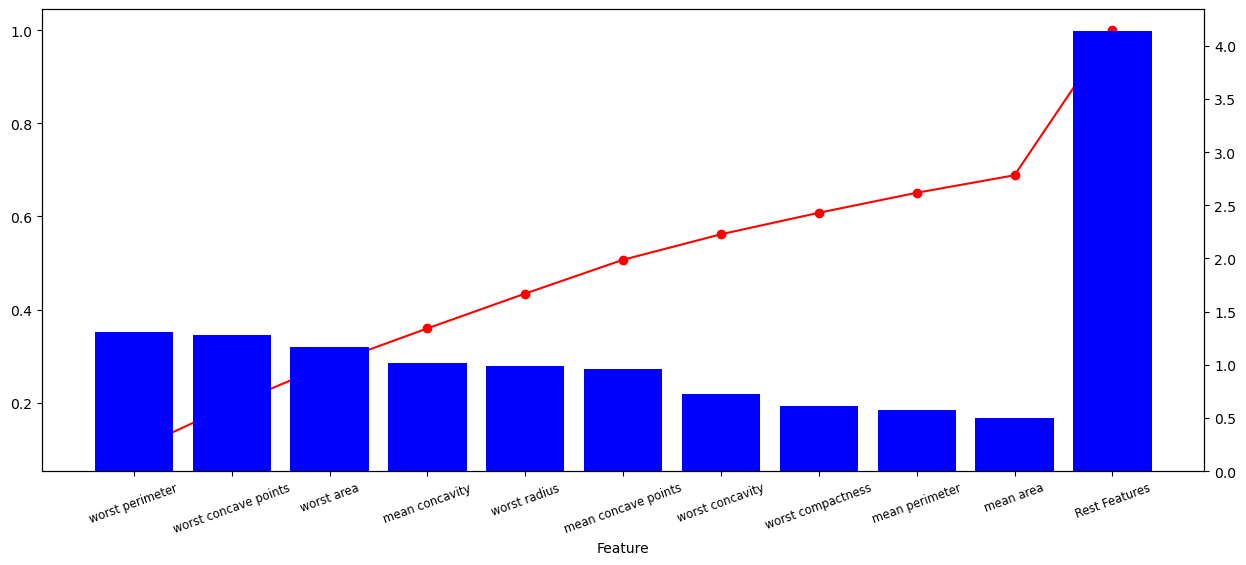

In [60]:
# create a line and bar chart to plot the RFGI Ratio values in the line chart and RF Global Importance values in bar chart against the Feature column
# plot the line chart on a secondary y axis
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(15, 6))
ax2 = ax1.twinx()
# reduce the font size for x axis labels for fig ax1 to 8
# position the text in x axis labels for fig ax1 at 30 degree angle
ax1.tick_params(axis="x", labelsize='small', rotation=20)
ax1.set_xlabel("Feature")
ax1.plot(resultcoeffnew["Feature"], resultcoeffnew["RFGI Ratio"], color="red", marker="o")
ax2.bar(resultcoeffnew["Feature"], resultcoeffnew["RF Global Importance"], color="blue")
plt.show()